In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_moons

%matplotlib inline
%config InlineBackend.figure_format='retina'

## Генернируем данные

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

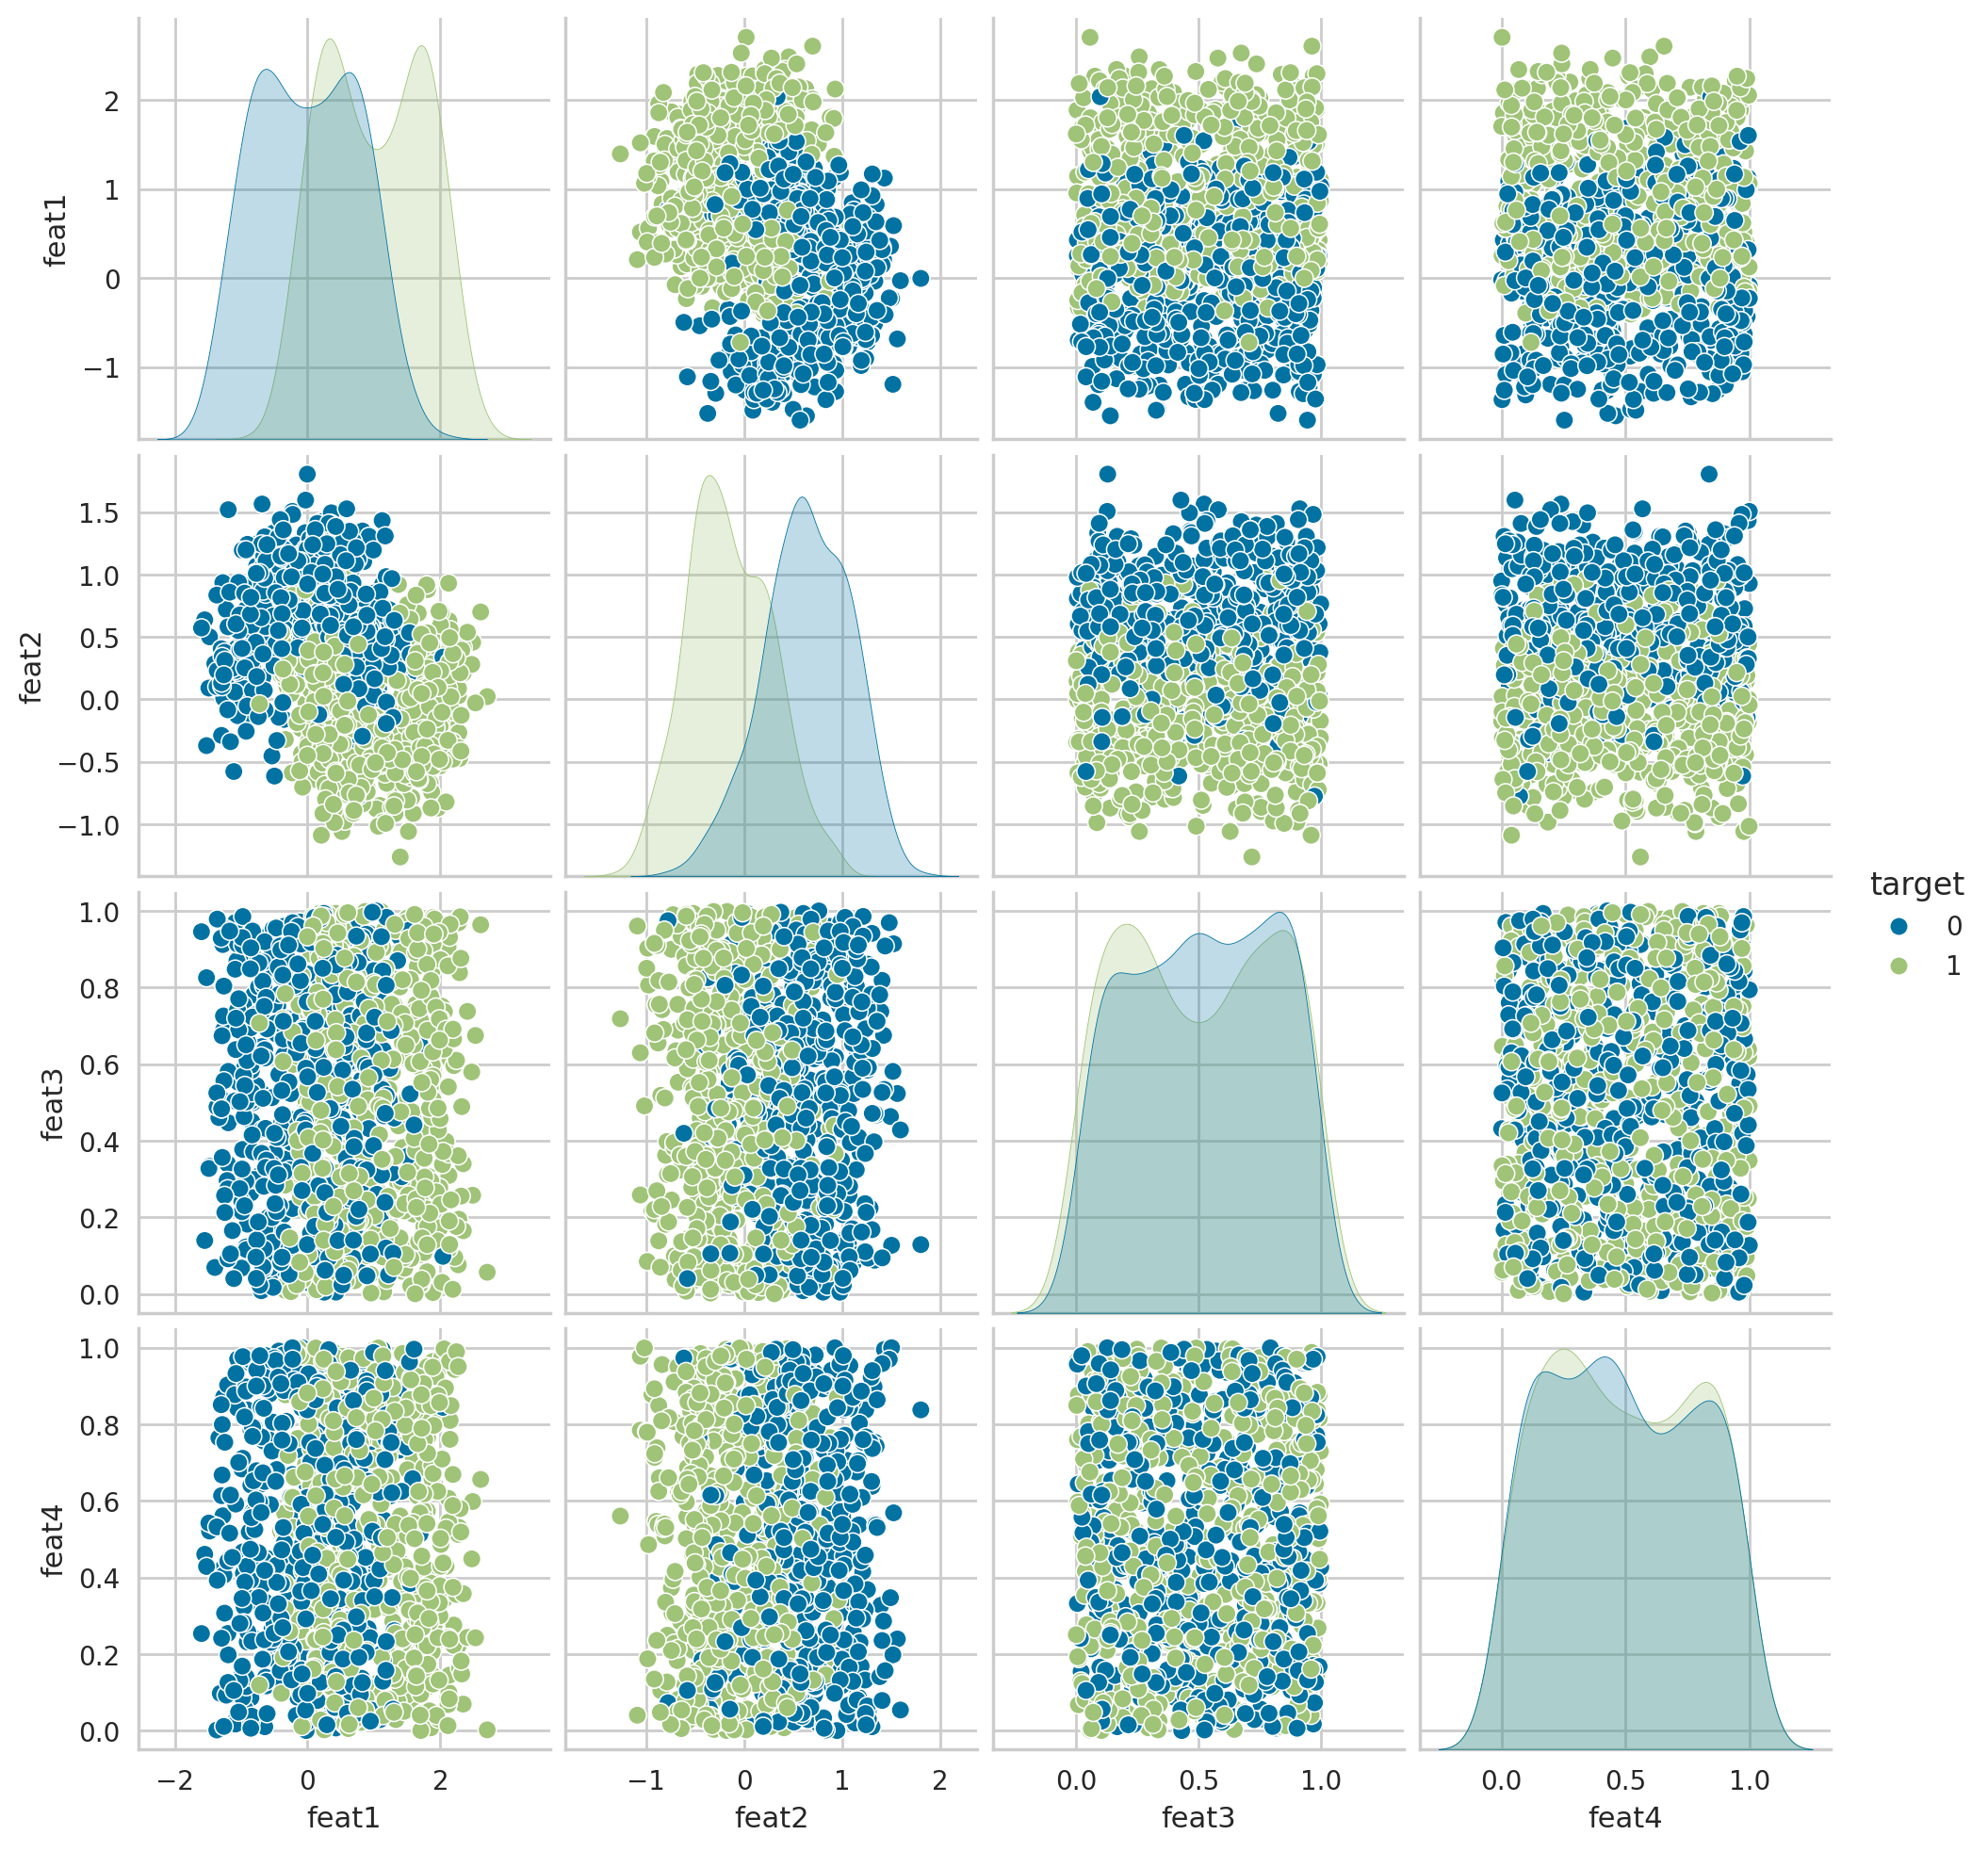

In [13]:
X, y = make_moons(n_samples=1_000, random_state=0, noise=0.3)

df = pd.DataFrame({
    'feat1': X[:, 0],
    'feat2': X[:, 1],
    'feat3': np.random.rand(X.shape[0]),
    'feat4': np.random.rand(X.shape[0]),
    'target': y
})

sns.pairplot(df, hue='target')

## Сравнение доступных алгоритмов

In [14]:
from pycaret.classification import setup, compare_models, tune_model, evaluate_model, create_model
from dask.distributed import Client
from pycaret.parallel import FugueBackend

In [15]:
s = setup(
  data=df, 
  target='target',
  n_jobs=1
)

,Description,Value
0,Session id,4902
1,Target,target
2,Target type,Binary
3,Original data shape,"(1000, 5)"
4,Transformed data shape,"(1000, 5)"
5,Transformed train set shape,"(700, 5)"
6,Transformed test set shape,"(300, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [16]:
dask_client = Client()

In [18]:
%%time
best = compare_models(
  parallel=FugueBackend(dask_client)  
)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9000,0.9452,0.9143,0.8910,0.9018,0.8000,0.8017,0.010
et,Extra Trees Classifier,0.8971,0.9508,0.8943,0.9015,0.8967,0.7943,0.7963,0.055
rf,Random Forest Classifier,0.8957,0.9447,0.9000,0.8966,0.8965,0.7914,0.7944,0.077
gbc,Gradient Boosting Classifier,0.8929,0.9512,0.8914,0.8964,0.8928,0.7857,0.7876,0.066
lightgbm,Light Gradient Boosting Machine,0.8800,0.9381,0.8800,0.8864,0.8806,0.7600,0.7641,0.026
ada,Ada Boost Classifier,0.8771,0.9468,0.8743,0.8820,0.8763,0.7543,0.7575,0.055
lr,Logistic Regression,0.8514,0.9286,0.8429,0.8600,0.8495,0.7029,0.7057,0.008
dt,Decision Tree Classifier,0.8486,0.8486,0.8457,0.8512,0.8473,0.6971,0.6989,0.009
nb,Naive Bayes,0.8457,0.9300,0.8457,0.8468,0.8453,0.6914,0.6930,0.008
qda,Quadratic Discriminant Analysis,0.8457,0.9283,0.8429,0.8493,0.8449,0.6914,0.6933,0.007


CPU times: user 134 ms, sys: 9.42 ms, total: 143 ms
Wall time: 4.95 s


In [6]:
dask_client

<Client: 'tcp://172.18.0.5:8786' processes=3 threads=24, memory=6.00 GiB>